# Dataset Regresión Lineal
## Vehicle

# 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [65]:
#Cargar las librerias necesrias

import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones

# librerías de para implementar modelos de ciencia de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [66]:
# lectura de datos en Python y lo cargamos en la variable Datos

dfVehiculos = pd.read_csv('G:/Mi unidad/PUBLIC/UNAD/Semestres/S6/AnalisisDeDatos/T3_Trabajo_COL_17042024/RegresionLineal/Car_details_v3.csv')

In [67]:
# Realizamos lectura de los Datos para el análisis exploratorio

dfVehiculos.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [68]:
# Se define un nuevo conjunto de nombres para las columnas
columnasEspanol = {'name': 'nombreAuto', 'year':'Anio', 'selling_price': 'precioVenta', 'km_driven': 'kmRecorridos','fuel':'combustible' ,'seller_type': 'tipoDeVendedor', 'transmission': 'transmision', 'owner': 'propietario', 'mileage':'kilometraje', 'engine':'motor', 'max_power':'potenciaMaxima', 'torque':'torque', 'seats':'asientos'  }

In [69]:
# Se renombran las columnas
dfVehiculos = dfVehiculos.rename(columns=columnasEspanol)

In [70]:
# confirmar el cambio en los encabezados de columna
dfVehiculos.head(3)

,nombreAuto,Anio,precioVenta,kmRecorridos,combustible,tipoDeVendedor,transmision,propietario,kilometraje,motor,potenciaMaxima,torque,asientos
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0


In [71]:
dfVehiculos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   nombreAuto      8128 non-null   object 
 1   Anio            8128 non-null   int64  
 2   precioVenta     8128 non-null   int64  
 3   kmRecorridos    8128 non-null   int64  
 4   combustible     8128 non-null   object 
 5   tipoDeVendedor  8128 non-null   object 
 6   transmision     8128 non-null   object 
 7   propietario     8128 non-null   object 
 8   kilometraje     7907 non-null   object 
 9   motor           7907 non-null   object 
 10  potenciaMaxima  7913 non-null   object 
 11  torque          7906 non-null   object 
 12  asientos        7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [72]:
# Descripción de los datos
dfVehiculos.describe()

,Anio,precioVenta,kmRecorridos,asientos
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [73]:
# confirmamos si hay datos faltantes, en este caso existen columnas con información faltante.
dfVehiculos.isna().sum()

nombreAuto          0
Anio                0
precioVenta         0
kmRecorridos        0
combustible         0
tipoDeVendedor      0
transmision         0
propietario         0
kilometraje       221
motor             221
potenciaMaxima    215
torque            222
asientos          221
dtype: int64

## <span style="color:red">Se completará el EDA posterior al proceso de identificar, completar o eliminar datos faltantes.</span>


# 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.

## Se completará información faltante en los registros incompletos, la información se tomará de otros registros que están completos y que coincidan con nombreAuto, Anio y transmision.

In [74]:
# Filtrar registros completos
registros_completos = dfVehiculos.dropna()

# Iterar sobre registros incompletos
for index, row in dfVehiculos[dfVehiculos.isnull().any(axis=1)].iterrows():
    # Encontrar registros completos que coincidan en 'nombreAuto', 'Anio' y 'transmision'
    registros_coincidentes = registros_completos[
        (registros_completos['nombreAuto'] == row['nombreAuto']) &
        (registros_completos['Anio'] == row['Anio']) &
        (registros_completos['transmision'] == row['transmision'])
    ]
    
    # Verificar si hay registros completos coincidentes
    if not registros_coincidentes.empty:
        # Tomar el primer registro coincidente
        registro_completo = registros_coincidentes.iloc[0]
        
        # Copiar valores de columnas faltantes
        for columna in ['kilometraje', 'motor', 'potenciaMaxima', 'torque', 'asientos']:
            dfVehiculos.at[index, columna] = registro_completo[columna]
    else:
        print(f"No hay registros completos coincidentes para el índice {index}")

# Mostrar la información actualizada del dataframe
dfVehiculos.info()


No hay registros completos coincidentes para el índice 13
No hay registros completos coincidentes para el índice 31
No hay registros completos coincidentes para el índice 78
No hay registros completos coincidentes para el índice 87
No hay registros completos coincidentes para el índice 119
No hay registros completos coincidentes para el índice 138
No hay registros completos coincidentes para el índice 200
No hay registros completos coincidentes para el índice 206
No hay registros completos coincidentes para el índice 228
No hay registros completos coincidentes para el índice 252
No hay registros completos coincidentes para el índice 306
No hay registros completos coincidentes para el índice 316
No hay registros completos coincidentes para el índice 336
No hay registros completos coincidentes para el índice 390
No hay registros completos coincidentes para el índice 516
No hay registros completos coincidentes para el índice 535
No hay registros completos coincidentes para el índice 539
N

## Se descartarán los registros incompletos, ya que se considera no se puede obtener ['kilometraje', 'motor', 'potenciaMaxima', 'torque', 'asientos'] por medio de la media o moda. Esas variables dependen especificamente del nombreAuto, Anio y transmision.

In [75]:
# Descartar registros incompletos.
dfVehiculos = dfVehiculos.dropna()
# Validar la data actual.
dfVehiculos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7919 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   nombreAuto      7919 non-null   object 
 1   Anio            7919 non-null   int64  
 2   precioVenta     7919 non-null   int64  
 3   kmRecorridos    7919 non-null   int64  
 4   combustible     7919 non-null   object 
 5   tipoDeVendedor  7919 non-null   object 
 6   transmision     7919 non-null   object 
 7   propietario     7919 non-null   object 
 8   kilometraje     7919 non-null   object 
 9   motor           7919 non-null   object 
 10  potenciaMaxima  7919 non-null   object 
 11  torque          7919 non-null   object 
 12  asientos        7919 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 866.1+ KB


## Se modificaran columnas que contienen valores númericos junto con cadenas de texto, se eliminaran las cadenas de texto y los numeros se convertiran en tipo float.

In [76]:
# Convertir la columna kilometraje a tipo string, eliminar las cadenas de texto ' kmpl' y ' km/kg', luego convertir a tipo float
dfVehiculos['kilometraje'] = dfVehiculos['kilometraje'].astype(str).str.replace(' kmpl', '').str.replace(' km/kg', '').astype(float)



In [77]:
# Convertir la columna motor a tipo string, eliminar las cadenas de texto ' CC', luego convertir a tipo float
dfVehiculos['motor'] = dfVehiculos['motor'].astype(str).str.replace(' CC', '').astype(float)


In [78]:
# Convertir la columna potenciaMaxima a tipo string, eliminar las cadenas de texto ' bhp', luego convertir a tipo float
dfVehiculos['potenciaMaxima'] = dfVehiculos['potenciaMaxima'].astype(str).str.replace(' bhp', '').astype(float)


## Se modificaran las columnas que contienen variables categoricas, se cambiaran por numeros que las representen.

### Variable combustible

In [79]:
dfVehiculos['combustible'].value_counts()

combustible
Diesel    4310
Petrol    3522
CNG         52
LPG         35
Name: count, dtype: int64

In [80]:
# Definir el diccionario de mapeo de valores
mapeo_combustible = {
    'Diesel': 1,
    'Petrol': 2,
    'CNG': 3,
    'LPG': 4
}

# Reemplazar los valores en la columna 'combustible' utilizando el diccionario de mapeo
dfVehiculos['combustible'] = dfVehiculos['combustible'].replace(mapeo_combustible)


In [81]:
dfVehiculos['combustible'].value_counts()

combustible
1    4310
2    3522
3      52
4      35
Name: count, dtype: int64

### Variable tipoDeVendedor

In [82]:
dfVehiculos['tipoDeVendedor'].value_counts()

tipoDeVendedor
Individual          6572
Dealer              1111
Trustmark Dealer     236
Name: count, dtype: int64

In [83]:
# Definir el diccionario de mapeo de valores
mapeo_tipoDeVendedor = {
    'Individual': 1,
    'Dealer': 2,
    'Trustmark Dealer': 3
}

# Reemplazar los valores en la columna 'tipoDeVendedor' utilizando el diccionario de mapeo
dfVehiculos['tipoDeVendedor'] = dfVehiculos['tipoDeVendedor'].replace(mapeo_tipoDeVendedor)

In [84]:
dfVehiculos['tipoDeVendedor'].value_counts()

tipoDeVendedor
1    6572
2    1111
3     236
Name: count, dtype: int64

### Variable transmision

In [85]:
dfVehiculos['transmision'].value_counts()

transmision
Manual       6878
Automatic    1041
Name: count, dtype: int64

In [86]:
# Definir el diccionario de mapeo de valores
mapeo_transmision = {
    'Manual': 1,
    'Automatic': 2
}

# Reemplazar los valores en la columna 'transmision' utilizando el diccionario de mapeo
dfVehiculos['transmision'] = dfVehiculos['transmision'].replace(mapeo_transmision)

In [87]:
dfVehiculos['transmision'].value_counts()

transmision
1    6878
2    1041
Name: count, dtype: int64

### Variable propietario

In [88]:
dfVehiculos['propietario'].value_counts()

propietario
First Owner             5224
Second Owner            2020
Third Owner              510
Fourth & Above Owner     160
Test Drive Car             5
Name: count, dtype: int64

In [89]:
# Definir el diccionario de mapeo de valores
mapeo_propietario = {
    'First Owner': 1,
    'Second Owner': 2,
    'Third Owner': 3,
    'Fourth & Above Owner': 4,
    'Test Drive Car': 5
}

# Reemplazar los valores en la columna 'propietario' utilizando el diccionario de mapeo
dfVehiculos['propietario'] = dfVehiculos['propietario'].replace(mapeo_propietario)

In [90]:
dfVehiculos['propietario'].value_counts()

propietario
1    5224
2    2020
3     510
4     160
5       5
Name: count, dtype: int64

### Variable nombreAuto

In [91]:
dfVehiculos['nombreAuto'].value_counts()

nombreAuto
Maruti Swift Dzire VDI                             129
Maruti Alto 800 LXI                                 82
Maruti Alto LXi                                     71
BMW X4 M Sport X xDrive20d                          62
Maruti Swift VDI                                    61
                                                  ... 
Skoda Fabia 1.4 TDI Ambiente                         1
Mahindra Scorpio VLX 2WD AT BSIII                    1
Renault KWID Climber 1.0 AMT                         1
Mahindra XUV300 W8 Option Dual Tone Diesel BSIV      1
Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV         1
Name: count, Length: 1982, dtype: int64

In [92]:
# Obtener los códigos de factorización para los valores únicos en la columna 'nombreAuto'
codigos_factorizacion, _ = pd.factorize(dfVehiculos['nombreAuto'])

# Asignar los códigos de factorización a la columna 'nombreAuto'
dfVehiculos['nombreAuto'] = codigos_factorizacion + 1  # Sumar 1 para que los códigos comiencen desde 1


In [93]:
dfVehiculos['nombreAuto'].value_counts()

nombreAuto
1       129
26       82
113      71
124      62
418      61
       ... 
1261      1
1266      1
1267      1
1268      1
1982      1
Name: count, Length: 1982, dtype: int64

### Variable torque

In [94]:
dfVehiculos['torque'].value_counts()

torque
190Nm@ 2000rpm             539
200Nm@ 1750rpm             445
90Nm@ 3500rpm              407
113Nm@ 4200rpm             223
114Nm@ 4000rpm             171
                          ... 
128Nm@ 3100rpm               1
72.9Nm@ 2250rpm              1
155 Nm at 1600-2800 rpm      1
510Nm@ 1600-2800rpm          1
96  Nm at 3000  rpm          1
Name: count, Length: 441, dtype: int64

In [95]:
# Obtener los códigos de factorización para los valores únicos en la columna 'torque'
codigos_factorizacion, _ = pd.factorize(dfVehiculos['torque'])

# Asignar los códigos de factorización a la columna 'nombreAuto'
dfVehiculos['torque'] = codigos_factorizacion + 1  # Sumar 1 para que los códigos comiencen desde 1


In [96]:
dfVehiculos['torque'].value_counts()

torque
1      539
15     445
25     407
57     223
56     171
      ... 
347      1
340      1
334      1
332      1
441      1
Name: count, Length: 441, dtype: int64

## Se identificaran valores atipicos.

In [97]:
print(dfVehiculos)

      nombreAuto  Anio  precioVenta  kmRecorridos  combustible  \
0              1  2014       450000        145500            1   
1              2  2014       370000        120000            1   
2              3  2006       158000        140000            2   
3              4  2010       225000        127000            1   
4              5  2007       130000        120000            2   
...          ...   ...          ...           ...          ...   
8123         180  2013       320000        110000            2   
8124         297  2007       135000        119000            1   
8125         216  2009       382000        120000            1   
8126         676  2013       290000         25000            1   
8127         676  2013       290000         25000            1   

      tipoDeVendedor  transmision  propietario  kilometraje   motor  \
0                  1            1            1        23.40  1248.0   
1                  1            1            2        21.14  1498

### <span style="color:red">Una vez completos o eliminados los datos faltantes se completa el proceso EDA.</span>


In [98]:
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")

fig, axes = plt.subplots(13, 1, figsize=(50, 150))

sns.histplot(ax=axes[0], x=dfVehiculos["nombreAuto"]).set_title("nombreAuto", fontsize=60);
sns.histplot(ax=axes[1], x=dfVehiculos["Anio"]).set_title("Anio", fontsize=60);
sns.histplot(ax=axes[2], x=dfVehiculos["kmRecorridos"]).set_title("kmRecorridos", fontsize=60);
sns.histplot(ax=axes[3], x=dfVehiculos["combustible"]).set_title("combustible", fontsize=60);
sns.histplot(ax=axes[4], x=dfVehiculos["tipoDeVendedor"]).set_title("tipoDeVendedor", fontsize=60);
sns.histplot(ax=axes[5], x=dfVehiculos["transmision"]).set_title("transmision", fontsize=60);
sns.histplot(ax=axes[6], x=dfVehiculos["propietario"]).set_title("propietario", fontsize=60);
sns.histplot(ax=axes[7], x=dfVehiculos["kilometraje"]).set_title("kilometraje", fontsize=60);
sns.histplot(ax=axes[8], x=dfVehiculos["motor"]).set_title("motor", fontsize=60);
sns.histplot(ax=axes[9], x=dfVehiculos["potenciaMaxima"]).set_title("potenciaMaxima", fontsize=60);
sns.histplot(ax=axes[10], x=dfVehiculos["torque"]).set_title("torque", fontsize=60);
sns.histplot(ax=axes[11], x=dfVehiculos["asientos"]).set_title("asientos", fontsize=60);
sns.histplot(ax=axes[12], x=dfVehiculos["precioVenta"]).set_title("precioVenta", fontsize=60);

plt.tight_layout()
plt.show()



In [99]:
# Revisamos correlaciones entre las variables
predictors_col = ['nombreAuto','Anio', 'kmRecorridos', 'combustible', 'tipoDeVendedor', 'transmision', 
                  'propietario','kilometraje','motor', 'potenciaMaxima','torque','asientos']
target_col = ['precioVenta']

In [100]:
predictors = dfVehiculos[predictors_col]
target = dfVehiculos[target_col]

<Axes: >

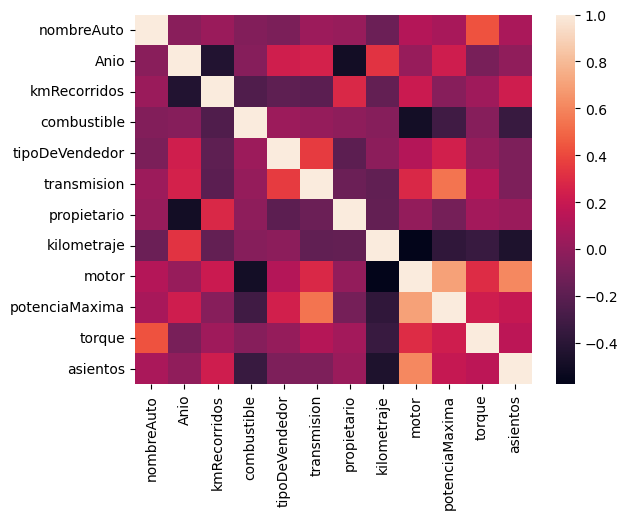

In [101]:
corr = predictors.corr()
sns.heatmap(corr)

### Podemos identificar algunas correlaciones, las más representativas son:
- kmRecorridos vs. Anio: Existe una correlación negativa moderada entre el kilometraje recorrido y el año de fabricación. Esto sugiere que los automóviles más antiguos tienden a tener un kilometraje más alto, lo cual es comprensible ya que han estado en uso durante más tiempo.

- combustible vs. transmision: Parece haber una correlación negativa moderada entre el tipo de combustible y el tipo de transmisión. Esto podría indicar que ciertos tipos de combustible tienden a estar asociados con un tipo específico de transmisión.

- kilometraje vs. potenciaMaxima: Existe una correlación negativa moderada entre el kilometraje y la potencia máxima del motor. Esto sugiere que a medida que el automóvil recorre más kilómetros, es posible que su potencia máxima disminuya, lo que podría deberse al desgaste del motor con el tiempo.

- motor vs. torque: Hay una correlación positiva moderada entre el tipo de motor y el torque. Esto indica que ciertos tipos de motores pueden estar diseñados para proporcionar más torque que otros.


### Buscar valores atipicos

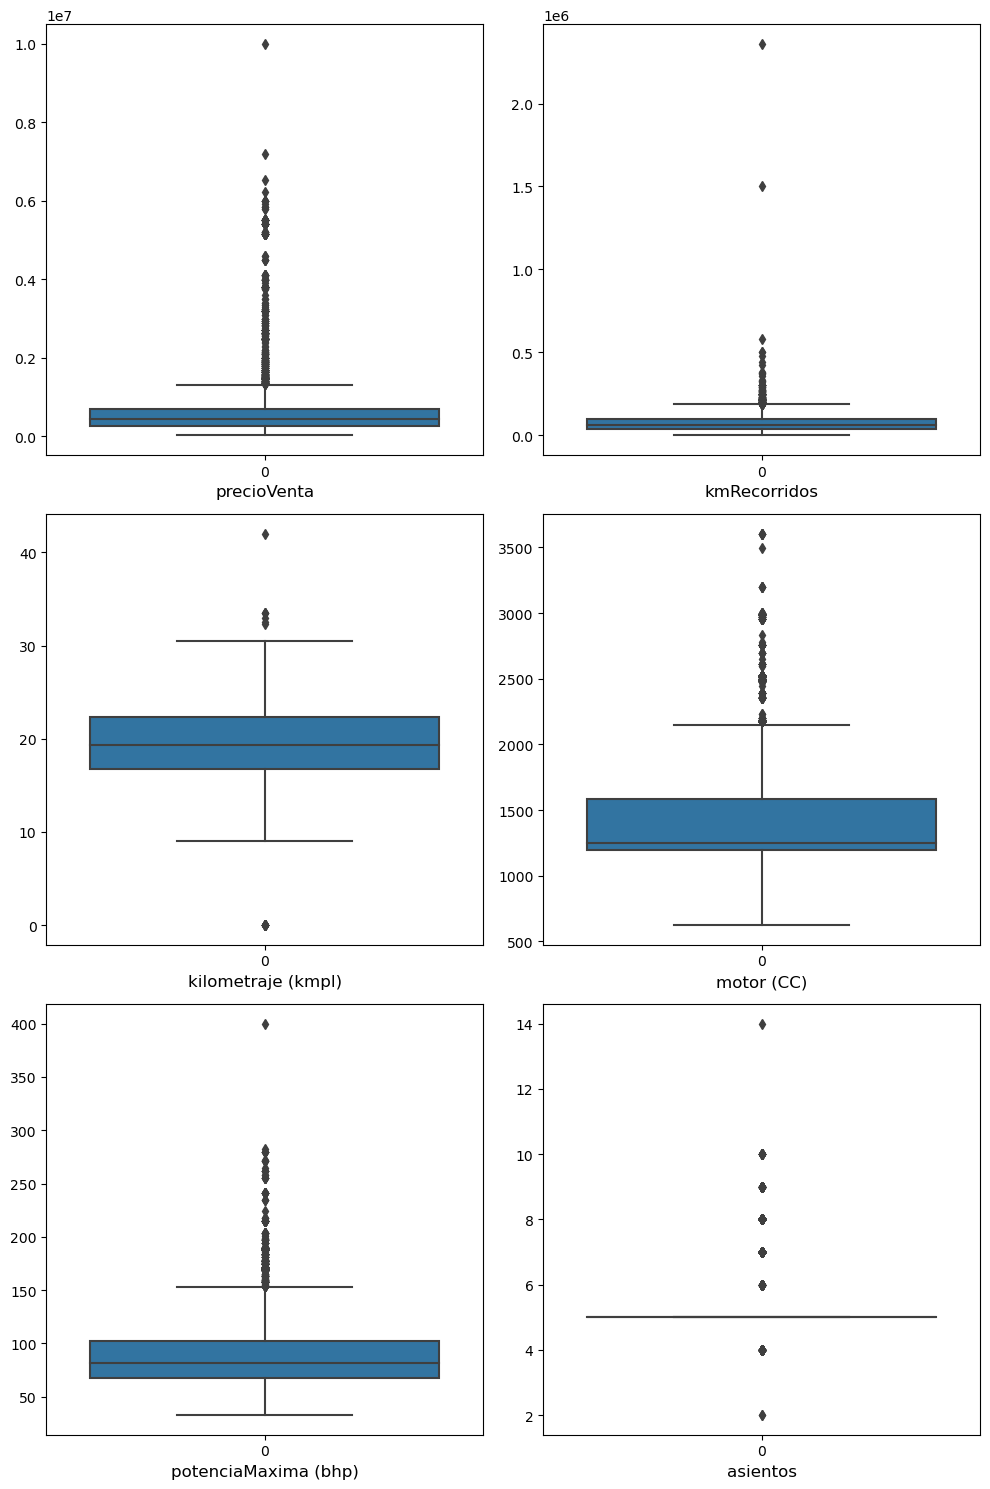

In [102]:
fig, axs = plt.subplots(3, 2, figsize=(10, 15))

plt1 = sns.boxplot(dfVehiculos['precioVenta'], ax=axs[0, 0])
plt1.set_xlabel('precioVenta', fontsize=12)

plt2 = sns.boxplot(dfVehiculos['kmRecorridos'], ax=axs[0, 1])
plt2.set_xlabel('kmRecorridos', fontsize=12)

plt7 = sns.boxplot(dfVehiculos['kilometraje'], ax=axs[1, 0])
plt7.set_xlabel('kilometraje (kmpl)', fontsize=12)

plt8 = sns.boxplot(dfVehiculos['motor'], ax=axs[1, 1])
plt8.set_xlabel('motor (CC)', fontsize=12)

plt9 = sns.boxplot(dfVehiculos['potenciaMaxima'], ax=axs[2, 0])
plt9.set_xlabel('potenciaMaxima (bhp)', fontsize=12)

plt11 = sns.boxplot(dfVehiculos['asientos'], ax=axs[2, 1])
plt11.set_xlabel('asientos', fontsize=12)

plt.tight_layout()
plt.show()


### Identificar y filtrar valores atipicos en la variable kmRecorridos

In [103]:
#Conteo de Datos Atípicos kmRecorridos

nivel_maximo=500000
Total_Atipicos=((dfVehiculos['kmRecorridos']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 3


In [104]:
# Filtra Datos Atípicos

dfVehiculos=dfVehiculos[(dfVehiculos['kmRecorridos']<nivel_maximo)]

In [105]:
#Revisión del tipo de datos y datos faltantes

dfVehiculos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7914 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   nombreAuto      7914 non-null   int64  
 1   Anio            7914 non-null   int64  
 2   precioVenta     7914 non-null   int64  
 3   kmRecorridos    7914 non-null   int64  
 4   combustible     7914 non-null   int64  
 5   tipoDeVendedor  7914 non-null   int64  
 6   transmision     7914 non-null   int64  
 7   propietario     7914 non-null   int64  
 8   kilometraje     7914 non-null   float64
 9   motor           7914 non-null   float64
 10  potenciaMaxima  7914 non-null   float64
 11  torque          7914 non-null   int64  
 12  asientos        7914 non-null   float64
dtypes: float64(4), int64(9)
memory usage: 865.6 KB


Text(0.5, 1.0, 'Identificación de Datos Atípicos kmRecorridos')

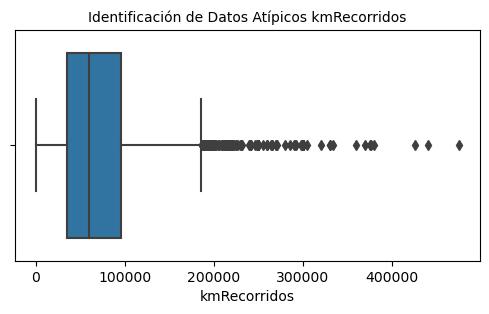

In [106]:
#Identificación de Datos Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=dfVehiculos['kmRecorridos'])
plt.title('Identificación de Datos Atípicos kmRecorridos', fontsize=10 )

### Identificar y filtrar valores atipicos en la variable potenciaMaxima

In [107]:
# Conteo de Datos Atípicos potenciaMaxima
nivel_minimo = 30
nivel_maximo = 300
Total_Atipicos = ((dfVehiculos['potenciaMaxima'] < nivel_minimo) | (dfVehiculos['potenciaMaxima'] > nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))


El total de datos atípicos es 1


In [108]:
# Filtra Datos Atípicos

dfVehiculos=dfVehiculos[(dfVehiculos['potenciaMaxima']>nivel_minimo)&(dfVehiculos['potenciaMaxima']<nivel_maximo)]

In [109]:
# Conteo de Datos Atípicos potenciaMaxima
nivel_minimo = 30
nivel_maximo = 300
Total_Atipicos = ((dfVehiculos['potenciaMaxima'] < nivel_minimo) | (dfVehiculos['potenciaMaxima'] > nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


In [110]:
dfVehiculos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7913 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   nombreAuto      7913 non-null   int64  
 1   Anio            7913 non-null   int64  
 2   precioVenta     7913 non-null   int64  
 3   kmRecorridos    7913 non-null   int64  
 4   combustible     7913 non-null   int64  
 5   tipoDeVendedor  7913 non-null   int64  
 6   transmision     7913 non-null   int64  
 7   propietario     7913 non-null   int64  
 8   kilometraje     7913 non-null   float64
 9   motor           7913 non-null   float64
 10  potenciaMaxima  7913 non-null   float64
 11  torque          7913 non-null   int64  
 12  asientos        7913 non-null   float64
dtypes: float64(4), int64(9)
memory usage: 865.5 KB


Text(0.5, 1.0, 'Identificación de Datos Atípicos potenciaMaxima')

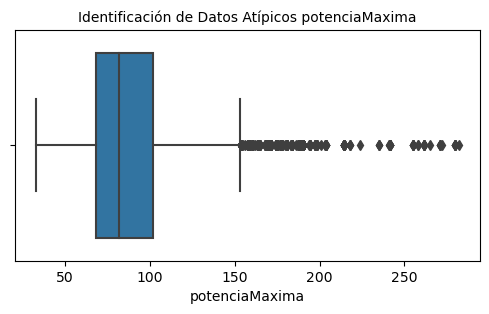

In [111]:
#Identificación de Datos Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=dfVehiculos['potenciaMaxima'])
plt.title('Identificación de Datos Atípicos potenciaMaxima', fontsize=10 )

### Identificar y filtrar valores atipicos en la variable kilometraje

In [112]:
#Conteo de Datos Atípicos kmRecorridos

nivel_maximo=30
Total_Atipicos=((dfVehiculos['kilometraje']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 8


In [113]:
# Filtra Datos Atípicos

dfVehiculos=dfVehiculos[(dfVehiculos['kilometraje']<nivel_maximo)]

In [114]:
#Revisión del tipo de datos y datos faltantes

dfVehiculos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7905 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   nombreAuto      7905 non-null   int64  
 1   Anio            7905 non-null   int64  
 2   precioVenta     7905 non-null   int64  
 3   kmRecorridos    7905 non-null   int64  
 4   combustible     7905 non-null   int64  
 5   tipoDeVendedor  7905 non-null   int64  
 6   transmision     7905 non-null   int64  
 7   propietario     7905 non-null   int64  
 8   kilometraje     7905 non-null   float64
 9   motor           7905 non-null   float64
 10  potenciaMaxima  7905 non-null   float64
 11  torque          7905 non-null   int64  
 12  asientos        7905 non-null   float64
dtypes: float64(4), int64(9)
memory usage: 864.6 KB


Text(0.5, 1.0, 'Identificación de Datos Atípicos kilometraje')

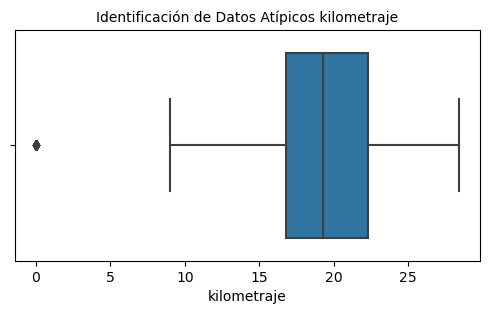

In [115]:
#Identificación de Datos Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=dfVehiculos['kilometraje'])
plt.title('Identificación de Datos Atípicos kilometraje', fontsize=10 )

### Revision datos faltantes

In [116]:
#Revisión de datos faltantes

print("Cantidad de Registros con cero en motor: ",dfVehiculos['motor'].isin([0]).sum())
print("Cantidad de Registros con cero en potenciaMaxima: ",dfVehiculos['potenciaMaxima'].isin([0]).sum())
print("Cantidad de Registros con cero en asientos: ",dfVehiculos['potenciaMaxima'].isin([0]).sum())

Cantidad de Registros con cero en motor:  0
Cantidad de Registros con cero en potenciaMaxima:  0
Cantidad de Registros con cero en asientos:  0


In [117]:
# Validar la data actual.
dfVehiculos.info()
dfVehiculos.head(3)

<class 'pandas.core.frame.DataFrame'>
Index: 7905 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   nombreAuto      7905 non-null   int64  
 1   Anio            7905 non-null   int64  
 2   precioVenta     7905 non-null   int64  
 3   kmRecorridos    7905 non-null   int64  
 4   combustible     7905 non-null   int64  
 5   tipoDeVendedor  7905 non-null   int64  
 6   transmision     7905 non-null   int64  
 7   propietario     7905 non-null   int64  
 8   kilometraje     7905 non-null   float64
 9   motor           7905 non-null   float64
 10  potenciaMaxima  7905 non-null   float64
 11  torque          7905 non-null   int64  
 12  asientos        7905 non-null   float64
dtypes: float64(4), int64(9)
memory usage: 864.6 KB


,nombreAuto,Anio,precioVenta,kmRecorridos,combustible,tipoDeVendedor,transmision,propietario,kilometraje,motor,potenciaMaxima,torque,asientos
0,1,2014,450000,145500,1,1,1,1,23.40,1248.0,74.00,1,5.0
1,2,2014,370000,120000,1,1,1,2,21.14,1498.0,103.52,2,5.0
2,3,2006,158000,140000,2,1,1,3,17.70,1497.0,78.00,3,5.0


# 3.Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características

### Caracteristica de interes:

#### precioVenta: probabilidad del precio con respecto a otra variables.
#### precioVenta: predecir el precio de un auto.

In [118]:
dfVehiculos['precioVenta'].value_counts()

precioVenta
300000     221
600000     211
350000     204
550000     203
450000     194
          ... 
486000       1
1670000      1
7200000      1
174000       1
746000       1
Name: count, Length: 667, dtype: int64

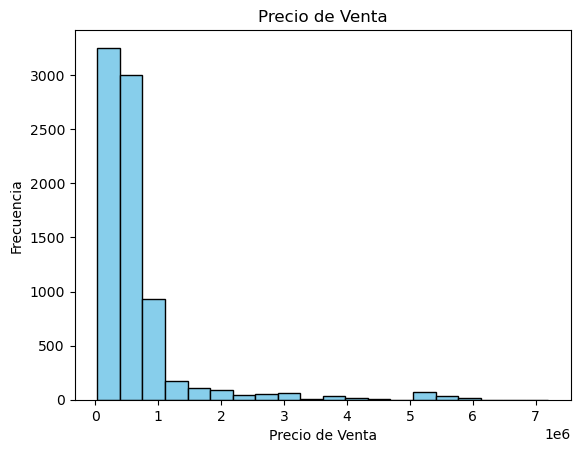

In [119]:
#dfVehiculos['precioVenta'].value_counts()

# Crear el histograma
plt.hist(dfVehiculos['precioVenta'], bins=20, color='skyblue', edgecolor='black')

# Agregar etiquetas y título
plt.xlabel('Precio de Venta')
plt.ylabel('Frecuencia')
plt.title('Precio de Venta')

# Mostrar el histograma
plt.show()

In [120]:
dfVehiculos['precioVenta'].head(5)

0    450000
1    370000
2    158000
3    225000
4    130000
Name: precioVenta, dtype: int64

# 4. Dividir el dataset en Train y Test para evaluar correctamente el modelo

In [121]:
# Porcentaje de datos para entrenamiento (train) = 75% , y para prueba (test) = 25%

# Se crean variables X y Y para almacenar la información del entrenamiento

X = dfVehiculos.drop('precioVenta',axis=1) # Se cargan los datos de train sin los datos de la columna precioVenta
Y = dfVehiculos['precioVenta'] # Se cargan los datos de train con los datos de la la columna precioVenta

#La función train_test_split crea una división de un conjunto de datos en dos bloques uno de entrenamiento y otro de prueba (train and test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=None, random_state= 0)

In [122]:
print (X_train)

      nombreAuto  Anio  kmRecorridos  combustible  tipoDeVendedor  \
1681          26  2016         65000            2               1   
4662        1378  2016        100000            1               1   
6690         118  2019         20000            2               2   
4563        1492  2005         80000            2               1   
3331         909  2012         90000            1               1   
...          ...   ...           ...          ...             ...   
5074         165  2011        105000            2               1   
3362        1290  2016         56239            1               2   
1702         184  2015         15200            2               1   
2691        1134  2013         60000            2               1   
2818          38  2001         42108            2               1   

      transmision  propietario  kilometraje   motor  potenciaMaxima  torque  \
1681            1            2        22.74   796.0           47.30      20   
4662         

In [123]:
print (Y_train)


1681     260000
4662     490000
6690    5150000
4563      93000
3331     545000
         ...   
5074     421000
3362     570000
1702     290000
2691     190000
2818      39000
Name: precioVenta, Length: 5928, dtype: int64


# 5. Entrenar el modelo configurando los diferentes hiperparámetros.

In [124]:
# Construir el modelo de regresión lineal
modelo_regresion = LinearRegression()

# Entrenar el modelo
modelo_regresion.fit(X_train, Y_train)

# Crea el modelo de predicción
Prediccion = modelo_regresion.predict(X_test)

In [125]:
print (Prediccion)

[ 805106.39122405  214582.19366965  164824.05016506 ... 3857757.49809352
 1102774.2034391   981015.4970016 ]


# 6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.

In [126]:
# Calcular el error cuadrático medio
mse = mean_squared_error(Y_test, Prediccion)

# Imprimir el error cuadrático medio
print("Error cuadrático medio:", mse)

Error cuadrático medio: 227155552308.91666


In [127]:
r2_score(Y_test, Prediccion)

0.672688248187107

# 7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.

### Diagrama de dispersión.

##### Nos permitirá visualizar cómo se ajustan las predicciones del modelo a los valores reales.

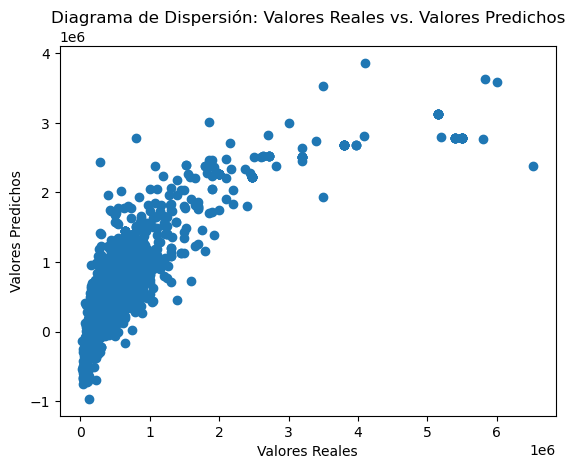

In [128]:
plt.scatter(Y_test, Prediccion)
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Diagrama de Dispersión: Valores Reales vs. Valores Predichos')
plt.show()

### Histograma de Residuos

##### Un histograma de residuos nos ayudarará a evaluar si los residuos siguen una distribución normal, lo que es deseable en un buen modelo.

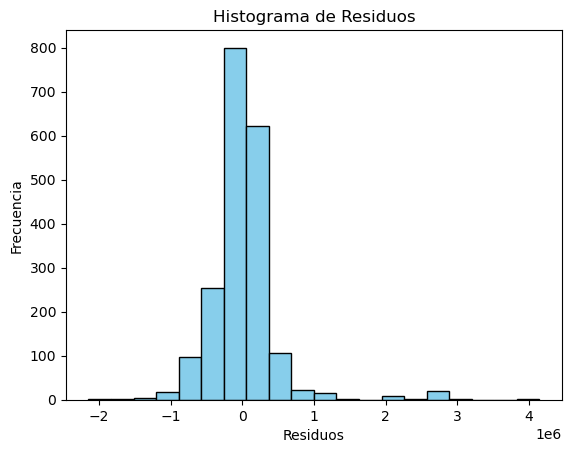

In [129]:
residuos = Y_test - Prediccion
plt.hist(residuos, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.title('Histograma de Residuos')
plt.show()

### Gráfico de Línea de Regresión

##### Una línea de regresión muestra cómo se ajusta el modelo a los datos de prueba.

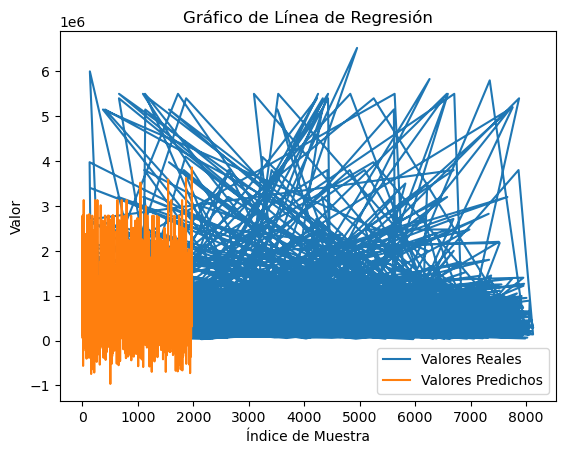

In [130]:
plt.plot(Y_test, label='Valores Reales')
plt.plot(Prediccion, label='Valores Predichos')
plt.xlabel('Índice de Muestra')
plt.ylabel('Valor')
plt.title('Gráfico de Línea de Regresión')
plt.legend()
plt.show()

### Gráfico de Densidad de Probabilidad

##### Este gráfico muestra la densidad de probabilidad de los valores reales y predichos, lo que puede ser útil para comparar sus distribuciones.

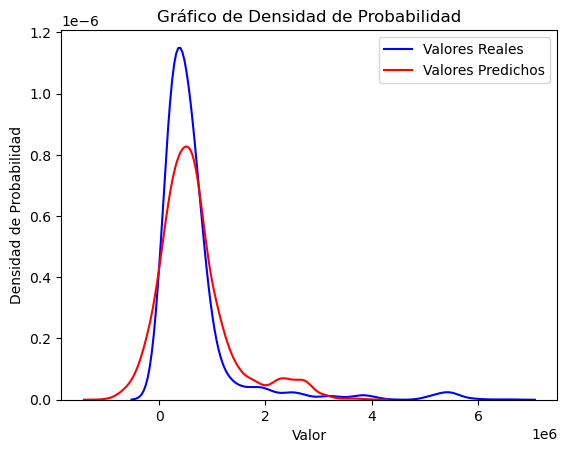

In [131]:
sns.kdeplot(Y_test, label='Valores Reales', color='blue')
sns.kdeplot(Prediccion, label='Valores Predichos', color='red')
plt.xlabel('Valor')
plt.ylabel('Densidad de Probabilidad')
plt.title('Gráfico de Densidad de Probabilidad')
plt.legend()
plt.show()

# 8. Interpretar, analizar y documentar los resultados obtenidos.

##### 
Del desempeño del modelo se puede describir:

Diagrama de Dispersión (Valores Reales vs. Valores Predichos):
   - Idealmente, los puntos estarían cerca de una línea diagonal, lo que indicaría una buena predicción. Sin embargo, hay dispersión alrededor de esta línea, lo que sugiere que el modelo no es perfecto, pero sigue una tendencia general.

Histograma de Residuos:
   - En este caso, parece haber una distribución normal centrada en cero, lo que indica que el modelo está capturando la tendencia general de los datos.

Gráfico de Línea de Regresión:
   - La línea de regresión muestra cómo se ajustan los valores predichos por el modelo a los datos de prueba. Sin embargo, la dispersión alrededor de esta línea sugiere que el modelo no captura perfectamente todas las variaciones en los datos.

Gráfico de Densidad de Probabilidad:
   - Se puede observar que la densidad de probabilidad de los valores predichos sigue la misma tendencia que la de los valores reales, lo que indica que el modelo está capturando la distribución de los datos de manera efectiva.

Error Cuadrático Medio (MSE):
   - El error cuadrático medio calculado es de aproximadamente 227155552308.91666.
   - El MSE es una medida de la calidad del ajuste del modelo a los datos. Cuanto menor sea el MSE, mejor será el ajuste del modelo. En este caso, el MSE parece ser bastante alto, lo que sugiere que el modelo podría mejorar en términos de precisión de las predicciones.

Coeficiente de Determinación (R^2 score):
   - El R^2 score es aproximadamente 0.67, lo que indica que el modelo explica aproximadamente el 67% de la variabilidad de los datos, lo cual sugiere un ajuste moderado del modelo a los datos.

Se puede concluir, que, aunque el modelo de regresión lineal parece capturar la tendencia general de los datos, hay margen para mejorar en términos de precisión de las predicciones, ya que el error cuadrático medio es bastante alto. Sería beneficioso explorar métodos de mejora del modelo, como la selección de características, la ingeniería de características o la exploración de modelos más complejos.


# 9. Crear una cuenta en GitHub y cargar los códigos de los modelos diseñados https://github.com/